**Business Case: Entregable para Módulo 1 TC3006**

**Daniel Munive Meneses - A01734205**

Fuimos contratados como científico de datos en una importante firma de fondos mutuos en el departamento de análisis financiero. La firma ha estado haciendo análisis financieros y pronósticos financieros durante varios años. Lo contrataron para idear enfoques alternativos para realizar análisis descriptivos con el fin de encontrar mejores alternativas futuras para los métodos de pronóstico.

Debemos analizar los estados financieros trimestrales históricos de todas las empresas públicas estadounidenses que cotizan en la Bolsa de Nueva York y NASDAQ.

Primeramente ya que que utilizo Google Colab fue necesario para mi el utilizar pip install on la mayoria de librerias que iba a utlizar dentro del desarrollo de mi modelo, para evitar que aparecieran tantos warning o errores despues de correr el codigo de borro los resultados de terminal de esta parte



In [1]:
!pip install matplotlib
!pip install pandas
!pip install pandas_datareader
!pip install dataprep

from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/Shareddrives/Reto AI SEPTIMO"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/Shareddrives/Reto AI SEPTIMO


En esta parte se continua con la importacion de las librerias que se van a utilizar, pero ademas agregando la importacion de los dos database que se nos fueron entregados para trabajar

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


!pip install seaborn
import seaborn as sns

data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [3]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


En esta parte se realiza el merge de las dos bases de datos con las que trajamos, siendo que utilizamos como indices de ambas columnas 'firm' y 'Ticker'
ademas de realizar la limpieza de datos que lleguen a estar vacios, y el dopero de 'Ticker' una vez que este hecho el merge para evitar el problema de tener columnas o rows extras

In [4]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing


Ya ahora con el dataframe completo, procederemos a caluclar los datos de columnas extras que vamos a necesitar para poder interpretar de manera correcta el modelo que queremos observar, se comienza calulando el 'market value' y el 'book value' donde podemos observar las formulas correspondientes de cada uno en el siguiente bloque de codigo

In [5]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

df = df.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

df = df.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


Para esta primera parte de la interpretacion de datos se decidio agrupar las distintas rows de firmas para que estas tuvieran un unico index de firma para cada cuatrimestre de esta.

Una vez hecho esto se procedio ahora a calcular los demas valor que ibamos a necesitar,variables como 'operating margin', 'ebit' .

In [6]:
df = [y for _, y in df.groupby('firm', as_index=False)]

In [7]:
for i in range(len(df)):
  df[i]['lprice'] = df[i].groupby(['firm'])['adjprice'].shift(4)
  df[i]['r'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i]['lprice'].astype(np.float))
  df[i]['r2'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i].groupby(['firm'])['adjprice'].shift(4).astype(np.float))
  df[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
  #book firm value
  x = (df[i]['originalprice'].astype(np.float) * df[i]['sharesoutstanding'].astype(np.float) )
  #profit margin measures
  df[i]['operating_profit'] = (df[i]['revenue'].astype(np.float) - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float))
  df[i]['ebit'] = (df[i]['revenue'].astype(np.float)  - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float)  - df[i]['otheropexp'].astype(np.float))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

Despues de haber colocado a 'firm' como index del database, se procede a realizar la suma de los datos que se puedan calcular de sus 4 utlimos cuatrimestres, pero como hay datos que no se pueden sumar, en esos casos unicamente me quedo con los dato de de su utlimo cuatrimestre calculado.

In [8]:

for i in range(len(df)):
  df[i]['revenue'] = df[i]['revenue'].astype(np.float)
  df[i]['cogs'] = df[i]['cogs'].astype(np.float)
  df[i]['sgae'] = df[i]['sgae'].astype(np.float)
  df[i]['otheropexp'] = df[i]['otheropexp'].astype(np.float)
  df[i]['extraincome'] = df[i]['extraincome'].astype(np.float)
  df[i]['finexp'] = df[i]['finexp'].astype(np.float)
  df_Final4 = df[i].tail(4)

  temp = df[i].tail(1)


  total_assets = list(temp['totalassets'])[0]
  total_liabilities = list(temp['totalliabilities'])[0]
  short_debt = list(temp['shortdebt'])[0]
  long_debt = list(temp['longdebt'])[0]
  stockholder_equity = list(temp['stockholderequity'])[0]
  adj_price = list(temp['adjprice'])[0]
  original_price = list(temp['originalprice'])[0]
  book_value = list(temp['book_value'])[0]
  market_value = list(temp['market_value'])[0]
  operating_profit = list(temp['operating_profit'])[0]
  ebit = list(temp['ebit'])[0]
  #operating_profit_margin = list(temp['operating_profit_margin'])[0]
  sharesout_standing = list(temp['sharesoutstanding'])[0]
  naics = list(temp['Sector NAICS\nlevel 1'])[0]
  name = list(temp['Name'])[0]
  newDF = df_Final4.groupby('firm', as_index = False).agg({'revenue':'sum','cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum'})

  newDF['totalassets'] = total_assets
  newDF['totalliabilities'] = total_liabilities
  newDF['shortdebt'] = short_debt
  newDF['longdebt'] = long_debt
  newDF['stockholderequity'] = stockholder_equity
  newDF['adjprice'] = adj_price
  newDF['originalprice'] = original_price
  newDF['sharesoutstanding'] = sharesout_standing
  newDF['book_value'] = book_value
  newDF['market_value'] = market_value
  newDF['operating_profit'] = operating_profit
  #newDF['operating_profit_margin'] = operating_profit_margin
  newDF['ebit'] = ebit
  newDF['Sector NAICS\nlevel 1'] = naics
  newDF['Name'] = name

  df[i] = newDF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/

In [9]:
mergedDF = pd.DataFrame()
for i in df:
  mergedDF = mergedDF.append(i, ignore_index = True)
mergedDF

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,stockholderequity,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,5122000,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,7292000,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,213698,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,-8422000,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,109101,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,87199.0,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,6605.0,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,229400.0,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,236623.0,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


Ya que operating profit marigin en un valor de tipo promedio ponderado, lo realizo despues de haber realizado el merge de los datos anteriores, para con esto poder evitar errores de calculo de este.

In [10]:
mergedDF = mergedDF.assign(operating_profit_margin=lambda x: x.ebit.astype(np.float) / x.revenue.astype(np.float))

mergedDF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,ebit,Sector NAICS\nlevel 1,Name,operating_profit_margin
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,3.600000e+05,Manufacturing,"Agilent Technologies, Inc",0.055156
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,7.320000e+05,Manufacturing,Alcoa Corp,0.054684
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp,0.142081
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc,0.024977
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-2.115000e+03,Finance and Insurance,Atlantic American Corp,-0.010830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-1.474300e+04,Manufacturing,Zevia Pbc,-0.094083
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-8.410000e+02,Educational Services,Zovio Inc,-0.003657
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp,0.157214
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc,-7.300701



# 2.1 General questions:



*   **By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?**

Dentro de las firmas publicas podemos comprender a "size" como el tamaño de la empresa, siendo que esta puede ser 'small', 'medium' o 'big' estas divididas en base al 'marketvalue' correspondiente a cada una de estas, donde ademas 'marketvalues' se obtiene mediante la multiplicacion de originalprice + sharesoutstandign, sale performance es otro valor importante para las mediciones etadisticas del modeaje, siendo que finalmente la 'pprofiability' al ser la cantidad del valor que va como ganancia para la industria, es de gran valor el conocer sobre estas.

*   **Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?**

Para poder obtener el 'stock return', es necesario calcular el rendimiento total de las acciones es la apreciación del precio más los dividendos pagados, dividido por el precio original de las acciones, donde las fuentes de ingresos de una acción son los dividendos y su aumento de valor. 

La primera parte del numerador de la fórmula de rendimiento total de acciones analiza cuánto ha aumentado el valor (P1 - P0). El denominador de la fórmula para calcular el rendimiento total de una acción es el precio original de la acción que se utiliza por ser la cantidad original invertida.






#2.2.1.1 Considering the most recent financial quarter

* **Show how many firms by industry there are in the sample**

COn este resultado podemos observar de manera clara la cantidad de firmas que existe por cada industria, algo que podeos rescatar en como 'Manufacturing', es la industria qu tiene un mayor numero de firmas, y por una gran diferencia en comparacion a las demas.

In [11]:
#d f.nunique()
mergedDF.groupby('Sector NAICS\nlevel 1')["firm"].nunique()


Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 


*   **For each industry (and for all industries)**
*   **What can you say about the typical firm size in terms of market value and book value?**
*   **How much these variables change within each industry?**
*   **How firm size (in market value) is distributed?**

Se puede notar de gran manera que si exite una diferencia por parte del 'market value' en las disintas firmas, donde en este es claro que existe un market value mayor en aquellos sectores con un mayor numero de firmas, como podria ser el Retail Trade, más sin embargo en otros casos como el de Arts,Entertainment, and Recreation, con un menor numero de firmas tambien llega a tener un alto valor de Market value esto quiza a razon del alto valor que pueden llegar a generar este tipo de sectores, en cuanto al book value se puede observar que los sectores en su mayoria estan dentro del mismo rango, claro con algunas excepciones, ya que si lo vemos al nivel de las firmas estas tienden a variar de gran manera a pesar de estar dentro del mismo secto, esto pudiendose deber a la diferencia de tamaño de estas.




In [12]:
# Revision de nombre de las columnas para los siguientes comandos
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit', 'ebit',
       'Sector NAICS\nlevel 1', 'Name', 'operating_profit_margin'],
      dtype='object')

El market Value, es el precio al que se negociaría un activo en una subasta competitiva. El valor de mercado a menudo se usa indistintamente con valor de mercado abierto, valor justo o valor de mercado justo, aunque estos términos tienen definiciones distintas en diferentes estándares y difieren en algunas circunstancias.



In [13]:
# Datos del Market Value de Cada Firma
mergedDF.groupby('firm')['market_value'].describe()



,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.547756e+07,NaN,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07
AA,1.0,8.407171e+06,NaN,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06
AAIC,1.0,1.138033e+05,NaN,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05
AAL,1.0,8.235848e+06,NaN,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06
AAME,1.0,5.446399e+04,NaN,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04
...,...,...,...,...,...,...,...,...
ZVIA,1.0,1.888586e+05,NaN,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05
ZVO,1.0,3.307650e+04,NaN,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04
ZWS,1.0,3.431356e+06,NaN,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06


En la siguiente tabla se muestran los market value que podemos obtener dentro de cada Sector, donde podemos notar que el sector con mayor 'mean' de market value es Retail Trade

In [14]:
# Datos del Market Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.693665e+06,2.506871e+07,1.104731e+04,2.792043e+05,1.474242e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,132.0,1.378746e+07,4.460524e+07,6.078575e+03,5.259900e+05,1.961411e+06,6.399546e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7.425361e+03,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.859302e+06,5.645182e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,697.0,8.332506e+06,2.906470e+07,9.530881e+03,3.555148e+05,1.253038e+06,4.744693e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,1.015306e+04,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

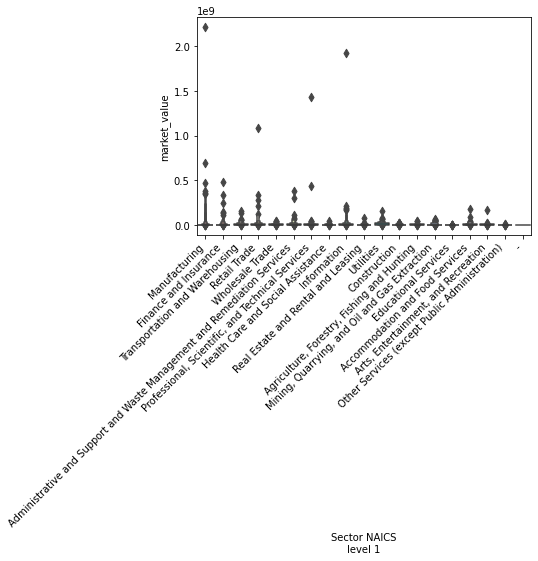

In [15]:
#Market Value
#barplot
sns.boxenplot(x='Sector NAICS\nlevel 1', y='market_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")

In [16]:
#Market Value median

mergedDF['market_value'].median()

1105860.1742999998

Con esto logramos obtener la mediana del maket values, con esto obteniendo que la mediana es igual a $105860.1742999998 USD, y con esto ademas decidi agregar la descripcion de Market Value para observar el mean y std de este, obteniendo con esto lo siguiente:

In [17]:
mergedDF['market_value'].describe()

count    3.559000e+03
mean     1.096046e+07
std      6.622548e+07
min      3.490000e+01
25%      1.932212e+05
50%      1.105860e+06
75%      4.615835e+06
max      2.212838e+09
Name: market_value, dtype: float64

El valor en libros significa literalmente el valor de un negocio según sus libros o cuentas, como se refleja en sus estados financieros. En teoría, es lo que obtendrían los inversores si vendieran todos los activos de la empresa y pagaran todas sus deudas y obligaciones. Por lo tanto, el valor en libros es aproximadamente igual a la cantidad que recibirían los accionistas si decidieran liquidar la empresa.

Con ayuda de esta tabla y de la grafica podemos comprender de mejor manera más clara el book value que podemos obtener de cada firma, pero ya que hay demasiadas firmas dentro del database para poder ir una por una, se decicio revisar a manera de Sectores, donde se puede ver que el secor con una mayor media de Book Value seria Utilities, aunque en el ploteo podemos observar como el sector con mayor dispersion de book value en sus firmas es Finance and Insurance.

In [18]:
# Datos del Book Value de Cada Firma
mergedDF.groupby('firm')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,5122000.000,NaN,5122000.000,5122000.000,5122000.000,5122000.000,5122000.000
AA,1.0,7292000.000,NaN,7292000.000,7292000.000,7292000.000,7292000.000,7292000.000
AAIC,1.0,213698.000,NaN,213698.000,213698.000,213698.000,213698.000,213698.000
AAL,1.0,-8422000.000,NaN,-8422000.000,-8422000.000,-8422000.000,-8422000.000,-8422000.000
AAME,1.0,109101.000,NaN,109101.000,109101.000,109101.000,109101.000,109101.000
...,...,...,...,...,...,...,...,...
ZVIA,1.0,87199.000,NaN,87199.000,87199.000,87199.000,87199.000,87199.000
ZVO,1.0,6605.000,NaN,6605.000,6605.000,6605.000,6605.000,6605.000
ZWS,1.0,229400.000,NaN,229400.000,229400.000,229400.000,229400.000,229400.000


In [19]:
mergedDF['book_value'].describe()

count    3.559000e+03
mean     3.200436e+06
std      1.349909e+07
min     -1.479100e+07
25%      9.744857e+04
50%      4.312830e+05
75%      1.728704e+06
max      2.861430e+08
Name: book_value, dtype: float64

In [20]:
# Datos del Book Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.0,5704446.00,5704446.0
Accommodation and Food Services,69.0,5.019647e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Administrative and Support and Waste Management and Remediation Services,132.0,2.677850e+06,7.116921e+06,-1026446.0,8.216000e+04,525086.0,1871825.00,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1068506.5,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,76168.0,1678528.00,96433000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Finance and Insurance,697.0,5.269128e+06,2.022819e+07,-5438611.0,2.828350e+05,1010618.0,3259895.00,286143000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

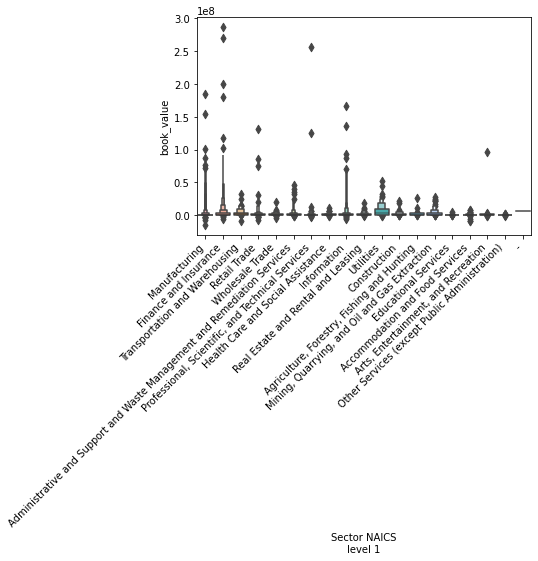

In [21]:
#Book Value

sns.boxenplot(x='Sector NAICS\nlevel 1', y='book_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")

In [22]:
#Market Book Value

mergedDF['book_value'].median()

431283.0

Es importante recalcar que la mediana que se tiene de Book Value, por cada una de las firmas de las bases de Datos es de $431283.0 USD

*   **For each industry For each industry (and for all industries)**
*   **What can you say about profit margin of firms? show**

Sabemos que con el 'Profit Margin' de las empresas es posible entender los margenes de beneficion que llegan a tener cada una de estas firmas, basicamente viendo de forma porcentual le ganancia de las mismas por sus ventas o servicios, lo interesante fue ver que no todas las firmas se encontraban dentro de un rango positivio de 'Profit Margin', siendo incluso que una gran catidad de estas se encontraban en un rango negativo lo que es algo importante a tener en cuenta.

*   **a) descriptive statistics of profit margin and**
*   **b) plot(s) to illustrate how profit margin changes across industries.**

a continuacion mostrare distintas tablas que nos dejarn obsevar la relacion que existe entre cada sector/firma, y su operating profit margin

In [23]:
MesuresDF = mergedDF[['firm', 'revenue', 'cogs', 'sgae', 'ebit']]
MesuresDF

,firm,revenue,cogs,sgae,ebit
0,A,6527000.0,3004000.0,2.056000e+06,3.600000e+05
1,AA,13386000.0,9653000.0,8.930000e+05,7.320000e+05
2,AAIC,31855.0,15523.0,0.000000e+00,4.526000e+03
3,AAL,40717000.0,0.0,4.160800e+07,1.017000e+06
4,AAME,195299.0,0.0,1.915230e+05,-2.115000e+03
...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,-1.474300e+04
3555,ZVO,230001.0,149303.0,1.118000e+05,-8.410000e+02
3556,ZWS,340300.0,195100.0,1.196000e+05,5.350000e+04
3557,ZY,14546.0,48949.0,2.327660e+05,-1.061960e+05


In [24]:
ProfitdDF = mergedDF[['firm', 'operating_profit', 'operating_profit_margin']]
ProfitdDF

,firm,operating_profit,operating_profit_margin
0,A,3.600000e+05,0.055156
1,AA,6.570000e+05,0.054684
2,AAIC,4.526000e+03,0.142081
3,AAL,1.017000e+06,0.024977
4,AAME,-2.115000e+03,-0.010830
...,...,...,...
3554,ZVIA,-6.700000e+03,-0.094083
3555,ZVO,-9.723000e+03,-0.003657
3556,ZWS,5.380000e+04,0.157214
3557,ZY,-6.573600e+04,-7.300701


In [25]:
mergedDF.groupby('firm')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.600000e+05,NaN,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05
AA,1.0,6.570000e+05,NaN,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05
AAIC,1.0,4.526000e+03,NaN,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03
AAL,1.0,1.017000e+06,NaN,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06
AAME,1.0,-2.115000e+03,NaN,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-6.700000e+03,NaN,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03
ZVO,1.0,-9.723000e+03,NaN,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03
ZWS,1.0,5.380000e+04,NaN,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04


In [26]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,126710.000000,NaN,126710.0,126710.000000,126710.000000,126710.00,126710.0
Accommodation and Food Services,69.0,235626.853177,6.324575e+05,-142000.0,5421.000000,38904.000000,157349.00,4004100.0
Administrative and Support and Waste Management and Remediation Services,132.0,163048.920693,4.942315e+05,-713000.0,95.500000,28169.000000,142138.50,4148000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,218999.116694,4.485638e+05,-18135.0,-1480.750000,19268.000000,160333.75,1616000.0
"Arts, Entertainment, and Recreation",21.0,206017.041144,5.320416e+05,-368756.0,4515.000000,54549.000000,178094.00,2390000.0
Construction,45.0,223408.468889,4.700429e+05,-90554.0,18727.000000,70000.000000,207221.00,2168200.0
Educational Services,14.0,14396.571429,5.877502e+04,-141260.0,371.000000,16561.500000,38039.50,126641.0
Finance and Insurance,697.0,262307.167099,1.119289e+06,-1315000.0,11680.000000,41290.000000,137300.00,15128000.0
Health Care and Social Assistance,64.0,72550.071519,3.089014e+05,-204471.0,-10986.250000,300.000000,62180.75,2264000.0


En esta parte podemos observar el 'mean' que existe de profit margin de dentro de cada sector, asi como sus percentiles de 25%, 50% y 75%

In [27]:
mergedDF.groupby('firm')['operating_profit_margin'].describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,0.055156,NaN,0.055156,0.055156,0.055156,0.055156,0.055156
AA,1.0,0.054684,NaN,0.054684,0.054684,0.054684,0.054684,0.054684
AAIC,1.0,0.142081,NaN,0.142081,0.142081,0.142081,0.142081,0.142081
AAL,1.0,0.024977,NaN,0.024977,0.024977,0.024977,0.024977,0.024977
AAME,1.0,-0.010830,NaN,-0.010830,-0.010830,-0.010830,-0.010830,-0.010830
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-0.094083,NaN,-0.094083,-0.094083,-0.094083,-0.094083,-0.094083
ZVO,1.0,-0.003657,NaN,-0.003657,-0.003657,-0.003657,-0.003657,-0.003657
ZWS,1.0,0.157214,NaN,0.157214,0.157214,0.157214,0.157214,0.157214


In [28]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.116434,NaN,0.116434,0.116434,0.116434,0.116434,0.116434
Accommodation and Food Services,69.0,0.026836,0.052608,-0.185496,0.006013,0.030179,0.052987,0.205075
Administrative and Support and Waste Management and Remediation Services,132.0,-0.228711,2.256826,-25.309333,-0.006001,0.017472,0.048322,0.456796
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.011563,0.094332,-0.325419,-0.018883,0.011591,0.028494,0.081257
"Arts, Entertainment, and Recreation",21.0,0.005289,0.158002,-0.489914,0.017141,0.029468,0.075602,0.219401
Construction,45.0,0.030784,0.041901,-0.067129,0.010090,0.030074,0.047405,0.223915
Educational Services,14.0,-0.001190,0.081691,-0.253790,0.001893,0.010315,0.029922,0.109233
Finance and Insurance,696.0,-inf,NaN,-inf,0.046634,0.156072,0.243971,0.604704
Health Care and Social Assistance,64.0,-inf,NaN,-inf,-0.107801,-0.009473,0.022602,0.073645


**Sample de los datos para poder observar de manera más limpia los datos**

Aqui podemos ver los puntos azules representando la ubicacion de las distintas firmas de cada sector y donde estas estan ubicadas en base a su 'operating profit margin', donde como se esperaba Manufacturing es el sector donde mas varian las firmas, esto puede deberse a que recordemos Manufacturing es el sector con el mayor numero de firmas por una gran diferencia.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

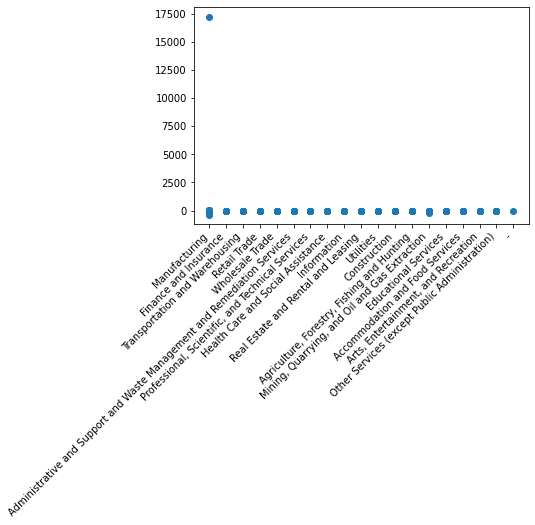

In [29]:
plt.scatter(mergedDF['Sector NAICS\nlevel 1'], mergedDF['operating_profit_margin'])


plt.xticks(rotation = 45, ha = "right")

**Ploteo General de todas las industrias con su debido Operating Profit Margin**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

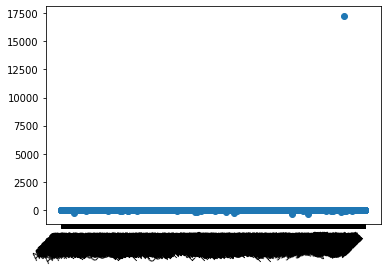

In [30]:
Modelo_Firm_ProfitMrgin = plt.scatter(mergedDF['firm'], mergedDF['operating_profit_margin'])

Modelo_Firm_ProfitMrgin = plt.xticks(rotation = 45, ha = "right")

print(Modelo_Firm_ProfitMrgin)



*   **Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?**


**Aqui podemos observar las 10 firmas con mayor balor de Market Value con sus respectivos valor de Market Value, asi como la Media de Market value que hay dentro de todas las Firmas que tenemos en la base de datos**

In [31]:
mergedDF['market_value'].mean()

10960461.118705181

In [32]:
mergedDF['market_value'].nlargest(n=10)


8       2.212838e+09
2097    1.920840e+09
1379    1.435042e+09
200     1.080624e+09
3182    6.976698e+08
3263    4.818731e+08
1721    4.671001e+08
2001    4.363946e+08
2255    3.789750e+08
3300    3.743426e+08
Name: market_value, dtype: float64

In [33]:

mergedDF.loc[[8, 2097, 1379, 200, 3182, 3263, 1721, 2001, 2255, 3300],'firm']

8        AAPL
2097     MSFT
1379    GOOGL
200      AMZN
3182     TSLA
3263      UNH
1721      JNJ
2001     META
2255     NVDA
3300        V
Name: firm, dtype: object

Como era de esperar empresas de gran conocimiento para el publico como Apple y Microsoft son las que se encuentran hasta el tope de firmas con mayor Maket Value


*   **Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?**

**Aqui podemos observar las 10 firmas con mayor balor de Book Value con sus respectivos valor de Book Value, asi como la Media de Book value que hay dentro de todas las Firmas que tenemos en la base de datos**

In [34]:
mergedDF['book_value'].mean()

3200436.1636636695

In [35]:
mergedDF['book_value'].nlargest(n=10)

1727    286143000.0
374     269118000.0
1379    255419000.0
545     199626000.0
3509    184508000.0
3430    179793000.0
2097    166542000.0
861     154562000.0
3050    135307000.0
200     131402000.0
Name: book_value, dtype: float64

In [36]:
mergedDF.loc[[1727, 374, 1379, 545, 3509, 3430, 2097, 861, 3050, 200],'firm']

1727      JPM
374       BAC
1379    GOOGL
545         C
3509      XOM
3430      WFC
2097     MSFT
861       CVX
3050        T
200      AMZN
Name: firm, dtype: object

Aquie podemos observar que quien se lleva el primer lugar es JPM, que vendria a ser el banco más grande de estados unidos, algo a esperar ya que el Book Value esta relacionado más sobre por asi decir el precio de la empresa a nivel de papel, por lo que era de esperar que un banco se llevara este primer lugar


# 2.2.1.2 Considering the whole history of financial data for all firms:    

En esta parte de la interpretacion del modelo, se nos planteron distintas preguntas que necesitaban que dentro de la database existiera la division por cuatrimestre, por lo que en este punto se volvio a realizar una copia del databes antes de hacer el colapse de las lines de cuatrimestes en una unica fila

In [37]:
dataExtra = pd.read_csv('us2022q2a.csv')
df1Extra = pd.read_csv('us2022q2a.csv',names = dataExtra.columns)
df1Extra

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


En esta parte procedemos realizar el merge de la database, esto en base a los indices seleccionados de 'Ticker' y 'Name', posterior a esto se hace la debida limpiesza de datos y se procese a realizar el merge de ambas databases

In [38]:
dataExtra = pd.read_csv('usfirms2022.csv')
df2Extra = pd.read_csv('usfirms2022.csv', names = dataExtra.columns)
df2Extra = df2Extra[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2Extra

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [39]:
dfExtra = pd.merge(df1Extra, df2Extra, left_on='firm', right_on="Ticker")
dfExtra = dfExtra.drop(columns=['Ticker'])
dfExtra = dfExtra.drop(dfExtra[dfExtra.firm.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.revenue.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.cogs.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.adjprice.isnull()].index)
dfExtra

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing




*   **How can you measure firm profitability that can be used to compare performance among firms of different sizes?**
*   **Select and justify at least 3 measures and show descriptive statistics**

Se selecciono los factores de BookToMarketRatio, ShortFinancialLeverage y LongFinancialLeverage ya que se considero que el conocimiento de esos factores seria de utilidad para poder comprender de mejor manera al database.

BookToMarketRatio - Identifica valores infravalorados o sobrevaluados tomando el book value y dividiéndolo por el market value. La relación determina el valor de mercado de una empresa en relación con su valor real.

ShortFinancialLeverage y LongFinancialLeverage - El Financial Leverage es el uso de la deuda para comprar más activos. El Leverage se emplea para aumentar el rendimiento del capital. Sin embargo, una cantidad excesiva de Financial Leverage aumenta el riesgo de quiebra, ya que se vuelve más difícil pagar la deuda.
La fórmula de Financial Leverage se mide como la relación entre la deuda total y los activos totales. A medida que aumenta la proporción de deuda a activos, también aumenta la cantidad de Financial Leverage. El Financial Leverage es favorable cuando los usos a los que se puede destinar la deuda generan rendimientos mayores que el gasto por intereses asociado con la deuda. Muchas empresas utilizan el Financial Leverage en lugar de adquirir más capital social, lo que podría reducir las ganancias por acción de los accionistas existentes.

In [40]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [41]:
#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))
dfExtra 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904


Despues de haber calulado el BootToMarketRatio procedo a desglozar de manera general toda la informacion que puedo sacar de ests variable calulada, muesto su .describe para poder observar el mean, std y lo percentiles del mismo, ademas de proceder a realizar las graficas por firma y por sector para poder ver de mejor manera el comportamiento de esta varible

In [42]:
dfExtra.groupby('firm')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.288494,0.120793,0.103716,0.217904,0.268915,0.343811,0.820484
AA,23.0,1.355959,0.971442,0.374854,0.809227,1.170410,1.495281,5.074055
AAIC,77.0,1.228171,0.552571,0.373104,0.941506,1.158641,1.481687,3.822178
AAL,35.0,-0.144885,0.382663,-1.022603,-0.514931,-0.001517,0.153169,0.263440
AAME,44.0,1.795551,0.629087,0.999613,1.323642,1.634052,2.083773,3.662740
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.286999,0.133422,0.148602,0.209419,0.268839,0.346420,0.461716
ZVO,44.0,0.720074,0.399884,0.199689,0.453955,0.653621,0.883630,2.098072
ZWS,41.0,0.300945,0.126009,0.028616,0.205552,0.293488,0.395857,0.503355


In [43]:
Sample1dDF = dfExtra[['firm', 'BookToMarketRatio']]
Sample1dDF

,firm,BookToMarketRatio
1,A,0.139169
2,A,0.221116
3,A,0.210718
4,A,0.394756
5,A,0.378058
...,...,...
323811,ZYNE,0.401883
323812,ZYNE,0.449880
323813,ZYNE,0.597384
323814,ZYNE,0.748904


**Aqui podemos observar los histogramas de cadada sector en base a su BookToMarketRatio**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f8504b10>,
      dtype=object)

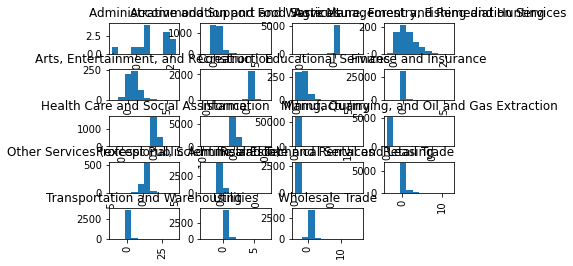

In [44]:
dfExtra.hist(column='BookToMarketRatio', by='Sector NAICS\nlevel 1')


In [45]:
#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830


Despues de haber calulado el ShortFinancialLeverage procedo a desglozar de manera general toda la informacion que puedo sacar de ests variable calulada, muesto su .describe para poder observar el mean, std y lo percentiles del mismo, ademas de proceder a realizar las graficas por firma y por sector para poder ver de mejor manera el comportamiento de esta varible

In [46]:
dfExtra.groupby('firm')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.050791,0.055500,0.000000,0.021751,0.032594,0.059510,0.243941
AA,23.0,0.002537,0.010334,0.000063,0.000067,0.000075,0.000897,0.049896
AAIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,35.0,0.041839,0.008872,0.027463,0.034723,0.039021,0.047526,0.060055
AAME,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.004057,0.001929,0.001888,0.002754,0.004131,0.005434,0.006076
ZVO,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZWS,41.0,0.007086,0.010558,0.000060,0.000678,0.004854,0.008571,0.062583


In [47]:
Sample2dDF = dfExtra[['firm', 'ShortFinancialLeverage']]
Sample2dDF

,firm,ShortFinancialLeverage
1,A,0.069936
2,A,0.067459
3,A,0.098516
4,A,0.060382
5,A,0.085132
...,...,...
323811,ZYNE,0.002100
323812,ZYNE,0.002307
323813,ZYNE,0.002576
323814,ZYNE,0.002830


**Aqui podemos observar los histogramas de cadada sector en base a su ShortFinancialLeverage**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e4e9b510>,
      dtype=object)

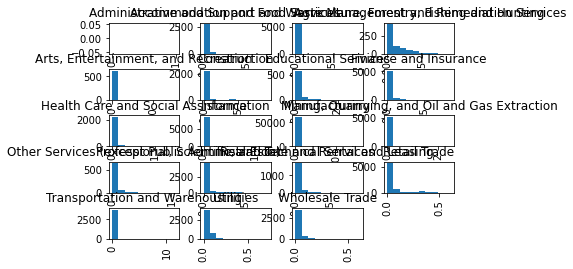

In [48]:
dfExtra.hist(column='ShortFinancialLeverage', by='Sector NAICS\nlevel 1')


In [49]:
#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936,0.000000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459,0.000000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516,0.000000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382,0.000000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100,0.004770
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307,0.004569
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576,0.004357
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830,0.003976


Despues de haber calulado el LongFinancialLeverage procedo a desglozar de manera general toda la informacion que puedo sacar de ests variable calulada, muesto su .describe para poder observar el mean, std y lo percentiles del mismo, ademas de proceder a realizar las graficas por firma y por sector para poder ver de mejor manera el comportamiento de esta varible

In [50]:
dfExtra.groupby('firm')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.193547,0.076053,0.000000,0.171441,0.206944,0.238204,0.381503
AA,23.0,0.116602,0.027216,0.079555,0.096540,0.114875,0.127486,0.178105
AAIC,78.0,0.044300,0.052730,0.000979,0.015593,0.018735,0.057950,0.206888
AAL,35.0,0.416729,0.063125,0.339314,0.360731,0.413919,0.441616,0.542572
AAME,45.0,0.107555,0.018407,0.083265,0.090759,0.104938,0.128502,0.150019
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.001865,0.002161,0.000008,0.000025,0.001647,0.003487,0.004155
ZVO,45.0,0.000712,0.004776,0.000000,0.000000,0.000000,0.000000,0.032038
ZWS,41.0,0.479835,0.102009,0.322382,0.385156,0.465212,0.574085,0.631874


In [51]:
Sample3dDF = dfExtra[['firm', 'LongFinancialLeverage']]
Sample3dDF

,firm,LongFinancialLeverage
1,A,0.000000
2,A,0.000000
3,A,0.000000
4,A,0.000000
5,A,0.000000
...,...,...
323811,ZYNE,0.004770
323812,ZYNE,0.004569
323813,ZYNE,0.004357
323814,ZYNE,0.003976


**Aqui podemos observar los histogramas de cadada sector en base a su LongFinancialLeverage**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e44f38d0>,
      dtype=object)

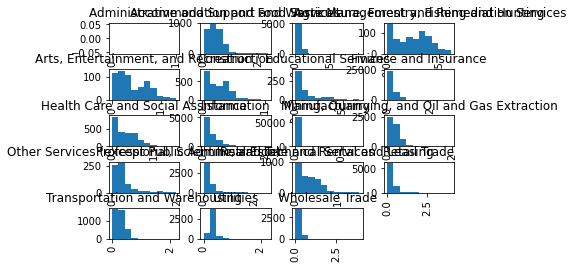

In [52]:
dfExtra.hist(column='LongFinancialLeverage', by='Sector NAICS\nlevel 1')




*   **Calculate and explain earnings per share deflated by price.**




In [53]:
dfExtra.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage'],
      dtype='object')

Earnings Per Share, se calcula como el beneficio de una empresa dividido por las acciones en circulación de su capital social. El número resultante sirve como indicador de la rentabilidad de una empresa. Es común que una empresa informe EPS que se ajustan por elementos extraordinarios y posible dilución de acciones.

In [54]:
#EPS = netincome / #SharesOutstanding
#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome

dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))

dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

dfExtra['EPS']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1         0.367036
2         0.342152
3         0.668323
4         0.337150
5         0.210032
            ...   
323811   -0.241205
323812   -0.256530
323813   -0.213867
323814   -0.200029
323815   -0.226007
Name: EPS, Length: 153245, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

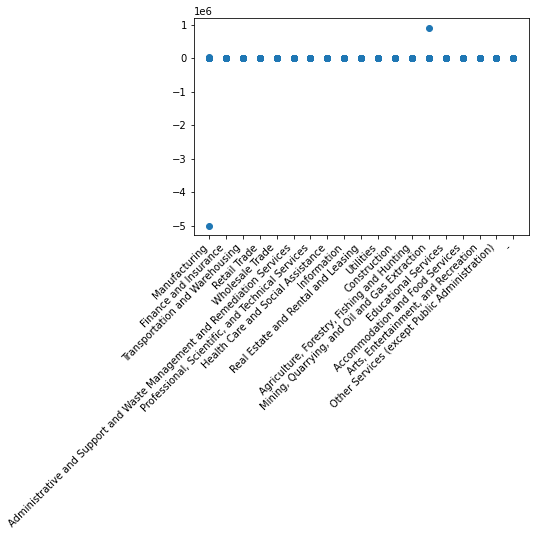

In [55]:
plt.scatter(dfExtra['Sector NAICS\nlevel 1'], dfExtra['EPS'])

plt.xticks(rotation = 45, ha = "right")

En este plot que se hizo de EPS en cada Sector podemos observar como la mayoria de firmas se manitenedentro de un rango cercano a 0, auque hay algunas excepsiones que salen de este comun, siendo esto en os sectores de Manufacturing y de Mining, Quarrying, and Oil and Gas Extraction.

In [56]:
dfExtra.groupby('firm')['EPS'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.420154,0.882221,-3.272292,0.212429,0.440763,0.636054,6.500151
AA,23.0,0.107468,1.385143,-2.166711,-1.059465,0.230570,0.872640,2.976438
AAIC,77.0,0.148678,1.799500,-2.562073,-0.202300,0.192839,0.547008,13.361668
AAL,35.0,-0.058771,2.753022,-9.438679,0.145322,0.740485,1.294718,5.205247
AAME,44.0,0.055248,0.145597,-0.395677,0.011156,0.045079,0.099880,0.580378
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.260217,0.116521,-0.400173,-0.334244,-0.238637,-0.164610,-0.163422
ZVO,44.0,-0.044586,0.498383,-1.778515,-0.218795,-0.011200,0.214259,0.905355
ZWS,41.0,0.202404,0.292077,-0.596276,0.119546,0.243112,0.367039,0.785181


Aqui muestro las firmas que tuvieron el 'EPS', mas bajo y en que correspondiente quatrimestre sucedio esto

In [57]:
sorted_df = dfExtra.sort_values(by=['EPS'], ascending=False)
sorted_df.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
19973,APA,2022q2,3052000,0,1529000,0,-226000,0,394000,13839000,...,2,Apache Corp,"Mining, Quarrying, and Oil and Gas Extraction",3.490000e+01,2490000.0,71346.704871,0.009032,0.352988,903000.0,903000.000000
313754,WLK,2004q3,572031.0,487520.0,15055.0,516.0,-12884.0,10144.0,17595.0,1505866.0,...,3,Westlake Corp,Manufacturing,2.486450e+01,722938.0,29075.107080,0.000797,0.230558,28317.0,25396.412556
256495,SEB,2020q4,1990000.0,1760000.0,88000.0,0.0,124000.0,-3000.0,4000.0,6399000.0,...,4,Seaboard Corp,Wholesale Trade,3.518321e+06,3828000.0,1.088019,0.060634,0.160181,265000.0,228.294964
316703,WTM,2021q4,944800.0,0.0,313300.0,0.0,-7200.0,0.0,-3300.0,7000700.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.059719e+06,3704700.0,1.210797,NaN,0.070036,627600.0,207.967998
316699,WTM,2020q4,520800.0,0.0,163500.0,0.0,14300.0,0.0,-117600.0,4831400.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.104058e+06,3817900.0,1.229970,NaN,0.074285,489200.0,157.704147


# 2.2.2 About statistical modeling

**You have to select a group of firms according to their general industry classification:**

*   Manufacturing industries
*   Commercial industries (retail and wholesale)
*   Service industries
*   Financial services

**Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.**


*   **Do histograms for each factor/variables and interpret them**
*   **Do plots to visualize the possible relationship each factor might have with the dependent variable.**
*   **Show descriptive statistics of these factors**

In [58]:
dfExtra.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 

Ya que el sector que se me fue asignado fue el sector de services, procedo a realizar una investigacion de cuales sectores pertenecen a este apartado, para ahora ya con esto proceder a realizar una nueva samplde de la database, pero esta vez unicamente con las firmas correspondientes a mi sector

In [59]:
df_Services = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Accommodation and Food Services') | (dfExtra['Sector NAICS\nlevel 1']=='Administrative and Support and Waste Management and Remediation Services') | (dfExtra['Sector NAICS\nlevel 1']=='Arts, Entertainment, and Recreation') | (dfExtra['Sector NAICS\nlevel 1']=='Educational Services') | (dfExtra['Sector NAICS\nlevel 1']=='Health Care and Social Assistance') | (dfExtra['Sector NAICS\nlevel 1']=='Information') | (dfExtra['Sector NAICS\nlevel 1']=='Other Services (except Public Administration)') |  (dfExtra['Sector NAICS\nlevel 1']=='Professional, Scientific, and Technical Services') | (dfExtra['Sector NAICS\nlevel 1']== 'Transportation and Warehousing')].copy()


df_Services

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
325,AAL,2013q4,7368000,0,7207000,0,-2238000,248000,-324000,42278000,...,4,American Airlines Group Inc,Transportation and Warehousing,5.353000e+06,-2731000.0,-0.510181,0.034202,0.363144,-2001000.0,-9.438679
326,AAL,2014q1,9995000,0,9265000,0,-1000,236000,13000,43737000,...,1,American Airlines Group Inc,Transportation and Warehousing,1.725753e+07,1095000.0,0.063451,0.032947,0.348538,480000.0,1.017991
327,AAL,2014q2,11355000,0,9956000,0,11000,206000,340000,44811000,...,2,American Airlines Group Inc,Transportation and Warehousing,3.093963e+07,4086000.0,0.132064,0.033987,0.339314,864000.0,1.199673
328,AAL,2014q3,11139000,0,9879000,0,-108000,203000,7000,44173000,...,3,American Airlines Group Inc,Transportation and Warehousing,2.554925e+07,4971000.0,0.194565,0.032576,0.354311,942000.0,1.308147
329,AAL,2014q4,10160000,0,9300000,0,-82000,211000,-30000,43771000,...,4,American Airlines Group Inc,Transportation and Warehousing,3.846684e+07,2021000.0,0.052539,0.039021,0.370017,597000.0,0.832330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323721,ZY,2021q2,5887.0,21829.0,81717.0,0.0,-435.0,2755.0,-16.0,725448.0,...,2,Zymergen Inc,"Professional, Scientific, and Technical Services",4.013994e+06,569345.0,0.141840,0.000000,0.110154,-100833.0,-1.005066
323722,ZY,2021q3,4082.0,17179.0,60956.0,21193.0,-199.0,2802.0,-18.0,627336.0,...,3,Zymergen Inc,"Professional, Scientific, and Technical Services",1.348474e+06,476816.0,0.353597,0.127876,0.000000,-98229.0,-0.959363
323723,ZY,2021q4,3039.0,9583.0,57090.0,7615.0,-412.0,6400.0,77.0,522396.0,...,4,Zymergen Inc,"Professional, Scientific, and Technical Services",6.850613e+05,408486.0,0.596277,0.084137,0.000000,-78138.0,-0.763060
323724,ZY,2022q1,4791.0,12455.0,56082.0,-130.0,-532.0,7994.0,-26.0,618189.0,...,1,Zymergen Inc,"Professional, Scientific, and Technical Services",2.980191e+05,344064.0,1.154503,0.093572,0.293062,-72116.0,-0.699335


In [60]:
df_Services.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
Accommodation and Food Services                                              69
Administrative and Support and Waste Management and Remediation Services    132
Arts, Entertainment, and Recreation                                          21
Educational Services                                                         14
Health Care and Social Assistance                                            64
Information                                                                 260
Other Services (except Public Administration)                                16
Professional, Scientific, and Technical Services                            144
Transportation and Warehousing                                               69
Name: firm, dtype: int64

In [61]:
df_Services.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage',
       'netincome', 'EPS'],
      dtype='object')

In [62]:
df_Services['q']

325       2013q4
326       2014q1
327       2014q2
328       2014q3
329       2014q4
           ...  
323721    2021q2
323722    2021q3
323723    2021q4
323724    2022q1
323725    2022q2
Name: q, Length: 30784, dtype: object

In [63]:
#df_Services
#df_Services['qdate'] = pd.PeriodIndex(df['q'], freq="Q")

df_Services.set_index(['firm', 'q'], inplace = True)

En esta parte procedo a realizar el multiindex de la base de datos para con esto poder realizar mas tarde el shift (correspondiente)

In [64]:
df_Services

revenue     cogs     sgae otheropexp extraincome  finexp  \
firm q                                                                   
AAL  2013q4   7368000        0  7207000          0    -2238000  248000   
     2014q1   9995000        0  9265000          0       -1000  236000   
     2014q2  11355000        0  9956000          0       11000  206000   
     2014q3  11139000        0  9879000          0     -108000  203000   
     2014q4  10160000        0  9300000          0      -82000  211000   
...               ...      ...      ...        ...         ...     ...   
ZY   2021q2    5887.0  21829.0  81717.0        0.0      -435.0  2755.0   
     2021q3    4082.0  17179.0  60956.0    21193.0      -199.0  2802.0   
     2021q4    3039.0   9583.0  57090.0     7615.0      -412.0  6400.0   
     2022q1    4791.0  12455.0  56082.0     -130.0      -532.0  7994.0   
     2022q2    2634.0   9732.0  58638.0    40460.0      -885.0  9376.0   

            incometax totalassets totalliabilities shortdebt  ... cto  \
firm q                                                        ...       
AAL  2013q4   -324000    42278000         45009000   1446000  ...   4   
     2014q1     13000    43737000         42642000   1441000  ...   1   
     2014q2    340000    44811000         40725000   1523000  ...   2   
     2014q3      7000    44173000         39202000   1439000  ...   3   
     2014q4    -30000    43771000         41750000   1708000  ...   4   
...               ...         ...              ...       ...  ...  ..   
ZY   2021q2     -16.0    725448.0         156103.0       0.0  ...   2   
     2021q3     -18.0    627336.0         150520.0   80221.0  ...   3   
     2021q4      77.0    522396.0         113910.0   43953.0  ...   4   
     2022q1     -26.0    618189.0         274125.0   57845.0  ...   1   
     2022q2      11.0    470968.0         234345.0    7900.0  ...   2   

                                    Name  \
firm q                                     
AAL  2013q4  American Airlines Group Inc   
     2014q1  American Airlines Group Inc   
     2014q2  American Airlines Group Inc   
     2014q3  American Airlines Group Inc   
     2014q4  American Airlines Group Inc   
...                                  ...   
ZY   2021q2                 Zymergen Inc   
     2021q3                 Zymergen Inc   
     2021q4                 Zymergen Inc   
     2022q1                 Zymergen Inc   
     2022q2                 Zymergen Inc   

                                        Sector NAICS\nlevel 1  market_value  \
firm q                                                                        
AAL  2013q4                    Transportation and Warehousing  5.353000e+06   
     2014q1                    Transportation and Warehousing  1.725753e+07   
     2014q2                    Transportation and Warehousing  3.093963e+07   
     2014q3                    Transportation and Warehousing  2.554925e+07   
     2014q4                    Transportation and Warehousing  3.846684e+07   
...                                                       ...           ...   
ZY   2021q2  Professional, Scientific, and Technical Services  4.013994e+06   
     2021q3  Professional, Scientific, and Technical Services  1.348474e+06   
     2021q4  Professional, Scientific, and Technical Services  6.850613e+05   
     2022q1  Professional, Scientific, and Technical Services  2.980191e+05   
     2022q2  Professional, Scientific, and Technical Services  1.268631e+05   

            book_value BookToMarketRatio ShortFinancialLeverage  \
firm q                                                            
AAL  2013q4 -2731000.0         -0.510181               0.034202   
     2014q1  1095000.0          0.063451               0.032947   
     2014q2  4086000.0          0.132064               0.033987   
     2014q3  4971000.0          0.194565               0.032576   
     2014q4  2021000.0          0.052539               0.039021   
...                ...         

In [65]:
#EPSP = EPS \ NetIncome('adjprice')

df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )

df_Services

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


revenue     cogs     sgae otheropexp extraincome  finexp  \
firm q                                                                   
AAL  2013q4   7368000        0  7207000          0    -2238000  248000   
     2014q1   9995000        0  9265000          0       -1000  236000   
     2014q2  11355000        0  9956000          0       11000  206000   
     2014q3  11139000        0  9879000          0     -108000  203000   
     2014q4  10160000        0  9300000          0      -82000  211000   
...               ...      ...      ...        ...         ...     ...   
ZY   2021q2    5887.0  21829.0  81717.0        0.0      -435.0  2755.0   
     2021q3    4082.0  17179.0  60956.0    21193.0      -199.0  2802.0   
     2021q4    3039.0   9583.0  57090.0     7615.0      -412.0  6400.0   
     2022q1    4791.0  12455.0  56082.0     -130.0      -532.0  7994.0   
     2022q2    2634.0   9732.0  58638.0    40460.0      -885.0  9376.0   

            incometax totalassets totalliabilities shortdebt  ...  \
firm q                                                        ...   
AAL  2013q4   -324000    42278000         45009000   1446000  ...   
     2014q1     13000    43737000         42642000   1441000  ...   
     2014q2    340000    44811000         40725000   1523000  ...   
     2014q3      7000    44173000         39202000   1439000  ...   
     2014q4    -30000    43771000         41750000   1708000  ...   
...               ...         ...              ...       ...  ...   
ZY   2021q2     -16.0    725448.0         156103.0       0.0  ...   
     2021q3     -18.0    627336.0         150520.0   80221.0  ...   
     2021q4      77.0    522396.0         113910.0   43953.0  ...   
     2022q1     -26.0    618189.0         274125.0   57845.0  ...   
     2022q2      11.0    470968.0         234345.0    7900.0  ...   

                                    Name  \
firm q                                     
AAL  2013q4  American Airlines Group Inc   
     2014q1  American Airlines Group Inc   
     2014q2  American Airlines Group Inc   
     2014q3  American Airlines Group Inc   
     2014q4  American Airlines Group Inc   
...                                  ...   
ZY   2021q2                 Zymergen Inc   
     2021q3                 Zymergen Inc   
     2021q4                 Zymergen Inc   
     2022q1                 Zymergen Inc   
     2022q2                 Zymergen Inc   

                                        Sector NAICS\nlevel 1  market_value  \
firm q                                                                        
AAL  2013q4                    Transportation and Warehousing  5.353000e+06   
     2014q1                    Transportation and Warehousing  1.725753e+07   
     2014q2                    Transportation and Warehousing  3.093963e+07   
     2014q3                    Transportation and Warehousing  2.554925e+07   
     2014q4                    Transportation and Warehousing  3.846684e+07   
...                                                       ...           ...   
ZY   2021q2  Professional, Scientific, and Technical Services  4.013994e+06   
     2021q3  Professional, Scientific, and Technical Services  1.348474e+06   
     2021q4  Professional, Scientific, and Technical Services  6.850613e+05   
     2022q1  Professional, Scientific, and Technical Services  2.980191e+05   
     2022q2  Professional, Scientific, and Technical Services  1.268631e+05   

            book_value BookToMarketRatio ShortFinancialLeverage  \
firm q                                                            
AAL  2013q4 -2731000.0         -0.510181               0.034202   
     2014q1  1095000.0          0.063451               0.032947   
     2014q2  4086000.0          0.132064               0.033987   
     2014q3  4971000.0          0.194565               0.032576   
     2014q4  2021000.0          0.052539               0.039021   
...                ...               ...                    ...   
ZY   2021q2   56

Para los histogramas limite el percentil de los datos dentro de un rango de .025 a .975, esto para evitar datos atipicos muy fuera del rango, y asi lograr tener una mejor interpretacion de los mismos

In [66]:
df_Services.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.000441,0.086882,-2.090190,0.002551,0.009453,0.015101,0.769951
Administrative and Support and Waste Management and Remediation Services,5483.0,-0.004273,0.120937,-5.029408,0.000054,0.008319,0.014006,1.459035
"Arts, Entertainment, and Recreation",616.0,-0.014728,0.113274,-1.604833,-0.014838,0.003367,0.015723,0.179043
Educational Services,697.0,-0.005168,0.070065,-0.564628,-0.000100,0.009303,0.016841,0.267409
Health Care and Social Assistance,2262.0,-0.033143,0.295434,-10.719325,-0.018791,0.006603,0.014958,0.931305
Information,8767.0,-0.016482,0.232303,-9.230902,-0.006501,0.003044,0.011123,3.139017
Other Services (except Public Administration),719.0,-0.026489,0.210846,-3.774593,-0.003530,0.008724,0.015737,0.581818
"Professional, Scientific, and Technical Services",5094.0,-0.023253,0.269076,-14.018716,-0.008719,0.005433,0.012061,1.305551
Transportation and Warehousing,3772.0,-0.011767,0.309898,-15.457564,0.005757,0.012594,0.019378,2.365267


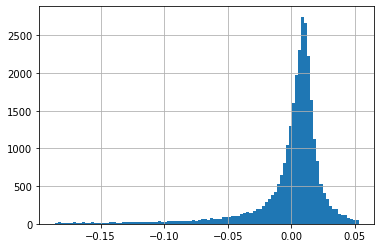

In [67]:
df_Services[(df_Services['EPSP'] < df_Services['EPSP'].quantile(.975)) & (df_Services['EPSP'] > df_Services['EPSP'].quantile(.025))]['EPSP'].hist(bins=100)

En este histograma podemos ver que el pico más alto de dispersion se encuentra alrededor de 0.01/0.02, llegando hasta aproximadamente a una frecuncia de 2000.

In [68]:
df_Services.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.387211,0.509152,-1.279225,0.113126,0.265284,0.541144,6.347458
Administrative and Support and Waste Management and Remediation Services,5483.0,0.367533,0.614831,-11.469108,0.145777,0.298134,0.510748,7.228003
"Arts, Entertainment, and Recreation",616.0,0.335582,0.427338,-1.026576,0.033378,0.285142,0.540609,3.076717
Educational Services,697.0,0.590080,0.509338,-0.195304,0.257208,0.502143,0.788192,5.940190
Health Care and Social Assistance,2262.0,0.451662,0.766682,-12.916357,0.198295,0.355827,0.585452,6.363197
Information,8767.0,0.409983,0.632293,-9.812714,0.109836,0.263720,0.551094,10.902423
Other Services (except Public Administration),719.0,0.391026,0.619763,-4.858867,0.186486,0.390131,0.593318,5.189368
"Professional, Scientific, and Technical Services",5094.0,0.387205,0.835076,-10.101796,0.144247,0.311076,0.571189,26.225984
Transportation and Warehousing,3772.0,0.692097,1.584601,-10.923350,0.256123,0.481675,0.809073,34.816437


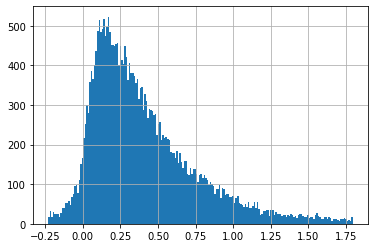

In [69]:
df_Services[(df_Services['BookToMarketRatio'] < df_Services['BookToMarketRatio'].quantile(.975)) & (df_Services['BookToMarketRatio'] > df_Services['BookToMarketRatio'].quantile(.025))]['BookToMarketRatio'].hist(bins=200)

En este histograma podemos ver que el pico más alto de dispersion se encuentra alrededor de 0.0/0.25, llegando hasta aproximadamente a una frecuencia de 500 en y.

In [70]:
df_Services.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2921.0,0.022788,0.036491,0.0,0.001105,0.010989,0.031369,0.746012
Administrative and Support and Waste Management and Remediation Services,5522.0,0.035633,0.119775,0.0,0.000000,0.008678,0.032651,4.287887
"Arts, Entertainment, and Recreation",622.0,0.070114,1.251303,0.0,0.005284,0.009718,0.021759,31.170158
Educational Services,704.0,0.017772,0.033285,0.0,0.000000,0.003452,0.022485,0.302018
Health Care and Social Assistance,2293.0,0.031978,0.061970,0.0,0.002917,0.012127,0.034997,1.483479
Information,8877.0,0.031666,0.095121,0.0,0.000000,0.005315,0.021296,1.244665
Other Services (except Public Administration),724.0,0.037336,0.075114,0.0,0.003226,0.012952,0.035715,1.077025
"Professional, Scientific, and Technical Services",5171.0,0.028669,0.074236,0.0,0.000000,0.005556,0.023041,0.771211
Transportation and Warehousing,3805.0,0.072287,0.495148,0.0,0.006368,0.024384,0.047999,11.767511


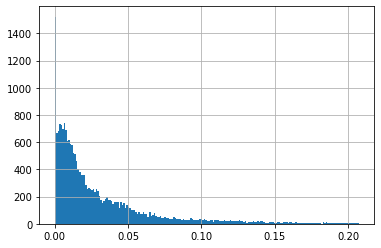

In [71]:
df_Services[(df_Services['ShortFinancialLeverage'] < df_Services['ShortFinancialLeverage'].quantile(.975)) & (df_Services['ShortFinancialLeverage'] > df_Services['ShortFinancialLeverage'].quantile(.025))]['ShortFinancialLeverage'].hist(bins=200)

En este histograma podemos ver que el pico más alto de dispersion se encuentra alrededor de 0.0/0.025, llegando hasta aproximadamente a una frecuencia de 700 en y, ademas de que el histograma aparentemente es asimetrico hacia la derecha

In [72]:
df_Services.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,3013.0,0.441632,0.329902,0.0,0.215190,0.414233,0.599412,2.361017
Administrative and Support and Waste Management and Remediation Services,5569.0,0.224443,0.215647,0.0,0.021095,0.189195,0.367809,4.624883
"Arts, Entertainment, and Recreation",622.0,0.418627,0.317099,0.0,0.173288,0.331114,0.690787,1.314168
Educational Services,704.0,0.101852,0.139073,0.0,0.000000,0.046997,0.142013,0.677926
Health Care and Social Assistance,2293.0,0.303534,0.252789,0.0,0.081685,0.272793,0.490568,1.537161
Information,8883.0,0.219924,0.235084,0.0,0.004734,0.158083,0.363997,2.078265
Other Services (except Public Administration),724.0,0.348442,0.365168,0.0,0.136458,0.256049,0.397962,1.961249
"Professional, Scientific, and Technical Services",5171.0,0.180006,0.233842,0.0,0.000000,0.099088,0.286492,2.523174
Transportation and Warehousing,3805.0,0.259835,0.184831,0.0,0.121400,0.256823,0.378528,2.203046


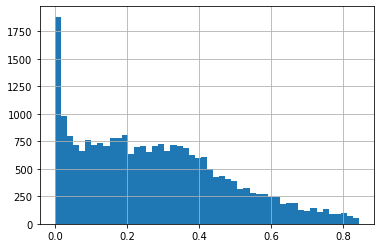

In [73]:
df_Services[(df_Services['LongFinancialLeverage'] < df_Services['LongFinancialLeverage'].quantile(.975)) & (df_Services['LongFinancialLeverage'] > df_Services['LongFinancialLeverage'].quantile(.025))]['LongFinancialLeverage'].hist(bins=50)

Este histograma es curioso, podriamos decir que es aparentemente asimetrico hacia la derecha , pero ya que los datos no muestran un claro ajuste es dificil interpretarla de manera exacta, ademas de que para este caso de decidio reducir el 'bins' para poder observar de mejor manera la frecuencia que se muestra en el histograma

In [74]:
df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['R']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


firm  q     
AAL   2013q4         NaN
      2014q1         NaN
      2014q2         NaN
      2014q3         NaN
      2014q4    0.758321
                  ...   
ZY    2021q2         NaN
      2021q3         NaN
      2021q4         NaN
      2022q1         NaN
      2022q2   -3.482115
Name: R, Length: 30784, dtype: float64

In [75]:
df_Services['R'].isnull().sum()

3113

In [76]:
df_Services['RNQ'] = df_Services.groupby(['firm'])['R'].shift(-1)

En los siguientes plot podemos observar la relacion que existe entre la variable dependiente (y = RNQ), y nuestros factores (x = 'EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'), siendo los puntos azules la distribucion de los distintos valores de los factores, y la linea roja es la pendiente que no ayuda a estimar la tasa de cambio promedio de los factores.

La variable Dependiente (RNQ) hace referencia a los retornos anuales continuos compuestos 1 trimestre en el futuro.

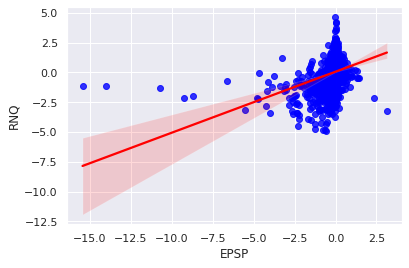

In [77]:
#df_Services.plot(kind = 'scatter', x = 'EPSP' , y = 'RNQ')

#plt.show() 

import seaborn as sns; sns.set_theme(color_codes=True)

x = sns.regplot(x="EPSP", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})


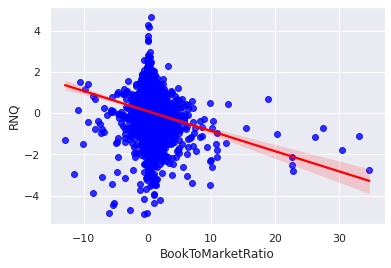

In [78]:
#df_Services.plot(kind = 'scatter', x = 'BookToMarketRatio', y = 'RNQ')

#plt.show() 

x = sns.regplot(x="BookToMarketRatio", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

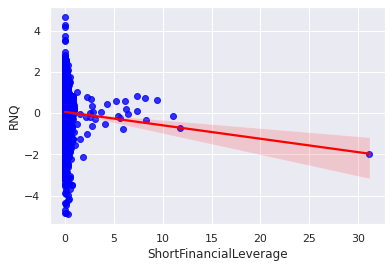

In [79]:
#df_Services.plot(kind = 'scatter', x = 'ShortFinancialLeverage', y = 'RNQ')

#plt.show()

x = sns.regplot(x="ShortFinancialLeverage", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

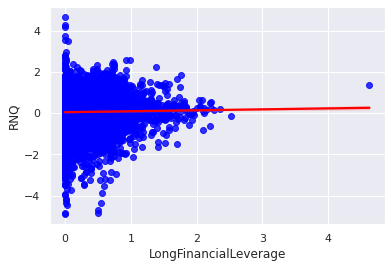

In [80]:
#df_Services.plot(kind = 'scatter', x = 'LongFinancialLeverage', y = 'RNQ')

#plt.show() 

#import seaborn as sns 
#sns.lmplot(x='LongFinancialLeverage',y='RNQ',data=df_Services,fit_reg=True)

x = sns.regplot(x="LongFinancialLeverage", y="RNQ", data=df_Services, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

En esta parte procedo a hacer un resumen de los datos de cada factor a manera de un Describe, lo ago en base a sectores ya que en caso de hacerlo por cada firma, estas serian demasiadas y seria muy complicado el poder hacer un correcta lectura de las mismas.

El método describe() devuelve la descripción de los datos en el DataFrame.

Si el DataFrame contiene datos numéricos, la descripción contiene esta información para cada columna:



*   count: el número de valores no vacíos.
*   mean - El valor promedio (media).
*   std - La desviación estándar.
*   min - el valor mínimo.
*   25% - El percentil 25%*.
*   50% - El percentil 50%*.
*   75% - El percentil 75%*.
*   max - el valor máximo.

*Significado de percentil: cuántos de los valores son menores que el percentil dado. 
Los percentiles se usan en estadísticas para darte un número que describe el valor que un porcentaje dado de los valores es menor que.

In [81]:
df_Services.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.000441,0.086882,-2.090190,0.002551,0.009453,0.015101,0.769951
Administrative and Support and Waste Management and Remediation Services,5483.0,-0.004273,0.120937,-5.029408,0.000054,0.008319,0.014006,1.459035
"Arts, Entertainment, and Recreation",616.0,-0.014728,0.113274,-1.604833,-0.014838,0.003367,0.015723,0.179043
Educational Services,697.0,-0.005168,0.070065,-0.564628,-0.000100,0.009303,0.016841,0.267409
Health Care and Social Assistance,2262.0,-0.033143,0.295434,-10.719325,-0.018791,0.006603,0.014958,0.931305
Information,8767.0,-0.016482,0.232303,-9.230902,-0.006501,0.003044,0.011123,3.139017
Other Services (except Public Administration),719.0,-0.026489,0.210846,-3.774593,-0.003530,0.008724,0.015737,0.581818
"Professional, Scientific, and Technical Services",5094.0,-0.023253,0.269076,-14.018716,-0.008719,0.005433,0.012061,1.305551
Transportation and Warehousing,3772.0,-0.011767,0.309898,-15.457564,0.005757,0.012594,0.019378,2.365267


In [82]:
df_Services.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2990.0,0.387211,0.509152,-1.279225,0.113126,0.265284,0.541144,6.347458
Administrative and Support and Waste Management and Remediation Services,5483.0,0.367533,0.614831,-11.469108,0.145777,0.298134,0.510748,7.228003
"Arts, Entertainment, and Recreation",616.0,0.335582,0.427338,-1.026576,0.033378,0.285142,0.540609,3.076717
Educational Services,697.0,0.590080,0.509338,-0.195304,0.257208,0.502143,0.788192,5.940190
Health Care and Social Assistance,2262.0,0.451662,0.766682,-12.916357,0.198295,0.355827,0.585452,6.363197
Information,8767.0,0.409983,0.632293,-9.812714,0.109836,0.263720,0.551094,10.902423
Other Services (except Public Administration),719.0,0.391026,0.619763,-4.858867,0.186486,0.390131,0.593318,5.189368
"Professional, Scientific, and Technical Services",5094.0,0.387205,0.835076,-10.101796,0.144247,0.311076,0.571189,26.225984
Transportation and Warehousing,3772.0,0.692097,1.584601,-10.923350,0.256123,0.481675,0.809073,34.816437


In [83]:
df_Services.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,2921.0,0.022788,0.036491,0.0,0.001105,0.010989,0.031369,0.746012
Administrative and Support and Waste Management and Remediation Services,5522.0,0.035633,0.119775,0.0,0.000000,0.008678,0.032651,4.287887
"Arts, Entertainment, and Recreation",622.0,0.070114,1.251303,0.0,0.005284,0.009718,0.021759,31.170158
Educational Services,704.0,0.017772,0.033285,0.0,0.000000,0.003452,0.022485,0.302018
Health Care and Social Assistance,2293.0,0.031978,0.061970,0.0,0.002917,0.012127,0.034997,1.483479
Information,8877.0,0.031666,0.095121,0.0,0.000000,0.005315,0.021296,1.244665
Other Services (except Public Administration),724.0,0.037336,0.075114,0.0,0.003226,0.012952,0.035715,1.077025
"Professional, Scientific, and Technical Services",5171.0,0.028669,0.074236,0.0,0.000000,0.005556,0.023041,0.771211
Transportation and Warehousing,3805.0,0.072287,0.495148,0.0,0.006368,0.024384,0.047999,11.767511


In [84]:
df_Services.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Accommodation and Food Services,3013.0,0.441632,0.329902,0.0,0.215190,0.414233,0.599412,2.361017
Administrative and Support and Waste Management and Remediation Services,5569.0,0.224443,0.215647,0.0,0.021095,0.189195,0.367809,4.624883
"Arts, Entertainment, and Recreation",622.0,0.418627,0.317099,0.0,0.173288,0.331114,0.690787,1.314168
Educational Services,704.0,0.101852,0.139073,0.0,0.000000,0.046997,0.142013,0.677926
Health Care and Social Assistance,2293.0,0.303534,0.252789,0.0,0.081685,0.272793,0.490568,1.537161
Information,8883.0,0.219924,0.235084,0.0,0.004734,0.158083,0.363997,2.078265
Other Services (except Public Administration),724.0,0.348442,0.365168,0.0,0.136458,0.256049,0.397962,1.961249
"Professional, Scientific, and Technical Services",5171.0,0.180006,0.233842,0.0,0.000000,0.099088,0.286492,2.523174
Transportation and Warehousing,3805.0,0.259835,0.184831,0.0,0.121400,0.256823,0.378528,2.203046


**Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model**


*   **For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model**
*   **You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test**

In [85]:
!pip install statsmodels
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Aqui procedi a realizar las separacion por tamaños de las empresas, tomando como factor para esto el market value de las mismas ya que considero que es el factor más importante para definir si una empresa es pequeña, mediana o grande

In [86]:
df_Services = df_Services.sort_values(by=['q','market_value'], ascending = True)
df_Services['size'] = df_Services.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))
df_Services[['size']].value_counts(sort = True)

size  
small     10159
big       10132
medium    10109
dtype: int64

En esta parte procedo a realizar los modelos de regresion multiple, primero de cada factor para poder observarlos de manera general, pero al final lo muestro en un unico modelo el cual sera el que procedere a interpretar más adelante

In [87]:
x = ['size','EPSP']

model2 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     274.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.33e-175
Time:                        16:13:26   Log-Likelihood:                -20588.
No. Observations:               27594   AIC:                         4.118e+04
Df Residuals:                   27590   BIC:                         4.122e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0403      0.005     -7.499      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
x = ['size','BookToMarketRatio']

model3 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     221.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          6.42e-142
Time:                        16:13:26   Log-Likelihood:                -20665.
No. Observations:               27594   AIC:                         4.134e+04
Df Residuals:                   27590   BIC:                         4.137e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0330      0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [89]:
x = ['size','ShortFinancialLeverage']

model4 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     222.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.85e-142
Time:                        16:13:27   Log-Likelihood:                -20910.
No. Observations:               27544   AIC:                         4.183e+04
Df Residuals:                   27540   BIC:                         4.186e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
x = ['size','LongFinancialLeverage']

model5 = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          3.19e-137
Time:                        16:13:27   Log-Likelihood:                -21017.
No. Observations:               27671   AIC:                         4.204e+04
Df Residuals:                   27667   BIC:                         4.207e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
copy = df_Services
copy = copy.dropna()
corr = copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ
market_value,1.000000,0.758334,-0.047204,-0.008554,-0.015484,0.811738,0.184606,0.021237,0.050856,0.039537
book_value,0.758334,1.000000,0.019418,-0.012781,-0.040669,0.695649,0.160094,0.026077,0.017928,0.015681
BookToMarketRatio,-0.047204,0.019418,1.000000,-0.034908,-0.138681,-0.034017,-0.080821,-0.239754,-0.207576,-0.158828
ShortFinancialLeverage,-0.008554,-0.012781,-0.034908,1.000000,0.037721,-0.007280,-0.009721,-0.032921,-0.039132,-0.034507
LongFinancialLeverage,-0.015484,-0.040669,-0.138681,0.037721,1.000000,-0.017447,-0.015123,-0.009400,0.021506,0.018778
netincome,0.811738,0.695649,-0.034017,-0.007280,-0.017447,1.000000,0.310632,0.083981,0.056089,0.051230
EPS,0.184606,0.160094,-0.080821,-0.009721,-0.015123,0.310632,1.000000,0.316634,0.124416,0.110289
EPSP,0.021237,0.026077,-0.239754,-0.032921,-0.009400,0.083981,0.316634,1.000000,0.267096,0.226620
R,0.050856,0.017928,-0.207576,-0.039132,0.021506,0.056089,0.124416,0.267096,1.000000,0.737517
RNQ,0.039537,0.015681,-0.158828,-0.034507,0.018778,0.051230,0.110289,0.226620,0.737517,1.000000


In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

**Resultados de VIF  de las variables**

In [94]:
calculate_vif(df=copy, features=['EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'])

,VIF,Tolerance
EPSP,1.064882,0.939071
BookToMarketRatio,1.085491,0.921242
ShortFinancialLeverage,1.004026,0.995990
LongFinancialLeverage,1.022628,0.977873


La multicolinealidad es un concepto estadístico en el que se correlacionan varias variables independientes en un modelo, para este caso se estan tomando encuentas los factores los cuales estanaran dentro del modelo de regresion mutiple, ('EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage'), en este caso podemos notar que la colinealidad entre las variables hay un factor de inflación de la varianza de alrededor de +1, siendo un caso parecido para la Tolerancia de estos, por lo que podriamos decir que estas variables no estan siendo afectadas a un grando de importancia, como para ser excluidas del modelo

In [95]:
x = ['size','EPSP','BookToMarketRatio','ShortFinancialLeverage','LongFinancialLeverage']

modelF = sm.OLS((df_Services['RNQ'].shift(-1)), sm.add_constant(pd.get_dummies(df_Services[x], drop_first=True)), missing = 'drop').fit()

print(modelF.summary())

                            OLS Regression Results                            
Dep. Variable:                    RNQ   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     147.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.56e-184
Time:                        16:13:27   Log-Likelihood:                -20464.
No. Observations:               27467   AIC:                         4.094e+04
Df Residuals:                   27460   BIC:                         4.100e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Interpret your model**

*   **Interpret the results of each coefficient (beta and their statistical significance)**
*   **Interpret the R-squared of the model**



Primaramente es importante mencion el valor de P donde se obtiene que en la mayoria de las variables de 0.000, unicamente quiza recalcando LongFinancialLeverage donde este valor llega a 0.005, pero sin embargo al final no es un valor lo suficientemente alto como para ser de importancia, siendo que con esto se puede decir que el modelo rechaza alguna hipotesis nula, y las variables son significativas.

En cuanto a los coeficientes de cada variable, los podemos ver como pendientes, por lo que con esto podemos ver algo interesante, en el como en BookToMarketRatio y en ShortFinancialLeverage, y como estos tienen un coeficiente negativo, aunque bueno por la deficion de ambos, es algo que de cierto forma era esperable.

En cuanto a su standard error o también se llamado desviación estándar. El error estándar muestra la variabilidad de muestreo de estos parámetros, siendo que en el caso de nuestro modelo este es considerablemente bajo por lo que los datos obtenidos estan cerca del sample que se utilizo para cada una de esta variables.

EN cuanto al valor de T nos indica la significación estadística de los distintos coeficientes donde veremos un valor maximo en size_big (t=20.648) y un valor minimo con ShortFinancialLeverage (t=6.3966)

R-squared es el coeficiente de determinación que nos dice que tanta variación porcentual de la variable independiente puede ser explicada por la variable independiente, en este caso podemos observar que esta es considerablemente baja ya que siendo que el limitle para R^2 es de 1, en el caso de nuestro modelo unicamente es de 0.031, por lo que apesar de todo podriamos ver que el modelo no es muy fiable, esto quiza se pueda deber al como se hizo la limpieza de datos de ld database donde quiza tengamos muchos datos vacios o incompletos.

Con esto podemos obsevar como las varibales como BookToMarketvalue en sus coeficientes podemos notar que la correlacion de esta varibales es negativa más especificamente de -0.0163 por lo que cuado la variable independiente aumente, el promedio de la variable dependiente,en este caso BookToMarketvalue disminuira, con ShortFinancialLeverage sucedera lo mismo, pero en el caso de LOngFinancialLeverage lo que sucedera es que esta variable auentara un promedio de 0.0348.





*   **Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.**

No se considero que ninguna variable fuera lo suficientemente insignificanete como para dropearla por lo que el modelo anterios seri8a el modelo final


**EXTRA**

Omnibus/Prob(Omnibus) – una prueba de la asimetría y curtosis del residual (característica #2). Esperamos ver un valor cercano a cero que indique normalidad. El Prob (Omnibus) realiza una prueba estadística que indica la probabilidad de que los residuos se distribuyan normalmente. Esperamos ver algo cercano a 1 aquí. En este caso, Omnibus es relativamente bajo y Prob (Omnibus) es relativamente alto, por lo que los datos son algo normales, pero no del todo ideales. Un enfoque de regresión lineal probablemente sería mejor que las conjeturas aleatorias, pero probablemente no tan bueno como un enfoque no lineal.

Skew: una medida de la simetría de los datos. Queremos ver algo cercano a cero, lo que indica que la distribución residual es normal. Tenga en cuenta que este valor también impulsa el Omnibus. Este resultado tiene un sesgo pequeño y, por lo tanto, bueno.

Kurtosis: una medida de "pico" o curvatura de los datos. Los picos más altos conducen a una mayor curtosis. Una mayor curtosis se puede interpretar como una agrupación más estrecha de residuos alrededor de cero, lo que implica un mejor modelo con pocos valores atípicos.

Durbin-Watson – pruebas de homocedasticidad (característica #3). Esperamos tener un valor entre 1 y 2. En este caso, los datos son cercanos, pero dentro de los límites.

Jarque-Bera (JB)/Prob(JB) – como la prueba Omnibus en que prueba tanto la asimetría como la curtosis. Esperamos ver en esta prueba una confirmación de la prueba Omnibus. En este caso lo hacemos.

Condition Number: esta prueba mide la sensibilidad de la salida de una función en comparación con su entrada (característica #4). Cuando tenemos multicolinealidad, podemos esperar fluctuaciones mucho mayores a pequeños cambios en los datos, por lo tanto, esperamos ver un número relativamente pequeño, algo por debajo de 30. En este caso, estamos muy por debajo de 30, lo que esperaríamos dado nuestro modelo solamente tiene dos variables y una es una constante.